<a href="https://colab.research.google.com/github/Jeevikavishwakarma/Customer_Churn_Prediction_Model/blob/main/Bank_Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df = dataset.copy()
df = df.drop(['RowNumber','CustomerId','Surname'], axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le_gender = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])
df = pd.get_dummies(df,columns = ['Geography'], drop_first = True)


In [ ]:
x = df.drop('Exited', axis = 1)
y = df['Exited']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state =42)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state =42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.866
[[1552   55]
 [ 213  180]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
importances = model.feature_importances_
features_names = x.columns

In [ ]:
df1 = pd.DataFrame({
    'Features' : features_names,
    'Importance': importances
}).sort_values(by = 'Importance', ascending =False)

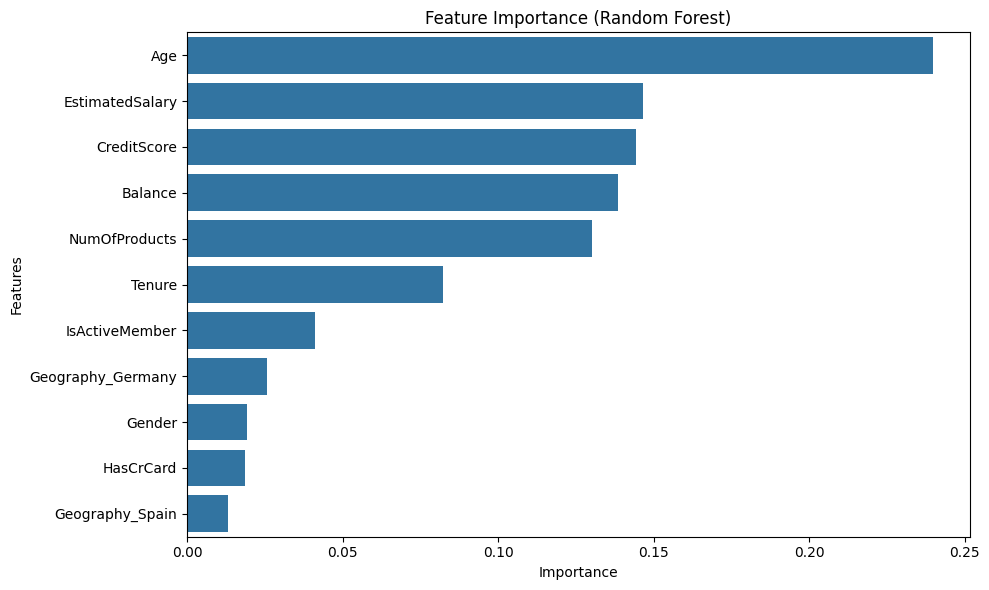

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(data = df1, x = 'Importance', y = 'Features')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()